In [1]:
import pandas as pd
import lxml.html as LH

In [2]:
# Парсинг файла

with open('plane.html', 'r') as pln:
    contents = str(pln.read())
    table = LH.fromstring(contents)

    for tr in pd.read_html(contents):
        trs = table.xpath('//td/@bgcolor')
        # print(trs)

pln.close()


In [3]:
# Делаем списки для каждого цвета
# R - Красный, G - Зеленый, B - Синий, Y - Яркость
R = []
G = []
B = []
Y = []

In [4]:
# Преобразование из Hex в RGB

for hx in trs:
    s = str(hx)
    # print(s)
    # print(type(s))
    hex = s.lstrip('#')
    rgb = list(int(hex[i:i + 2], 16) for i in (0, 2, 4))
    # print(rgb)

    R.append(rgb[0])
    G.append(rgb[1])
    B.append(rgb[2])
    
    Y.append(round(0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2]))  # Округление для получения нормальных цветов
    #print(Y)

In [5]:
# Dataframe из списка Y

datafr = pd.DataFrame(data=Y, columns=['x1'])
# print(datafr)

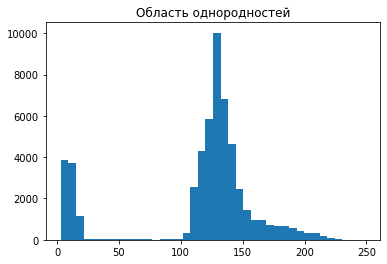

In [14]:
# Нормальное распределение
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure()
plt.hist(datafr, bins = 40)
plt.title('Область однородностей')
# plt.savefig('pic2.pdf')
plt.show()

In [7]:
from colormap import rgb2hex

YRED = []
for spam in Y:
    if 3 <= spam <= 33:
        spam = rgb2hex(255, 0, 0)
        YRED.append(spam)
    else:
        spam = rgb2hex(spam, spam, spam)
        YRED.append(spam)

In [8]:
# Итоговая таблица HTML

test = 0
fo = open('modified_plane.html', 'a')

fo.write('<HTML><HEAD><TITLE>plane_2.html</TITLE></HEAD><BODY><TABLE BORDER=0 CELLPADDING=0 CELLSPACING=0><tr>')
for row in YRED:
    # fo.write('<TR>')

    if test != 294:
        fo.write(f'<TD BGCOLOR={row}>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</TD>')
        test += 1
        # print(test)
    else:
        fo.write('</tr>')
        fo.write('<tr>')
        fo.write(f'<TD BGCOLOR={row}>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</TD>')
        # fo.write('</TR>')
        test = 1

fo.write('</TR></TABLE></BODY></HTML>')
fo.close()